## Getting started with qiskit

In [1]:
import numpy as np
from qiskit import *

In [2]:
circ = QuantumCircuit(3)

In [3]:
circ.h(0)
circ.cx(0,1)
circ.cx(0,2)

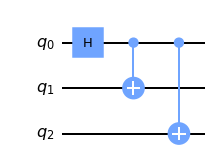

In [4]:
circ.draw('mpl')

In [5]:
from qiskit import Aer

backend = Aer.get_backend('statevector_simulator')

In [6]:
job = backend.run(circ)

In [7]:
result = job.result()

In [8]:
outputstate = result.get_statevector()
print(outputstate)

Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.        +0.j, 0.        +0.j, 0.        +0.j,
             0.        +0.j, 0.70710678+0.j],
            dims=(2, 2, 2))


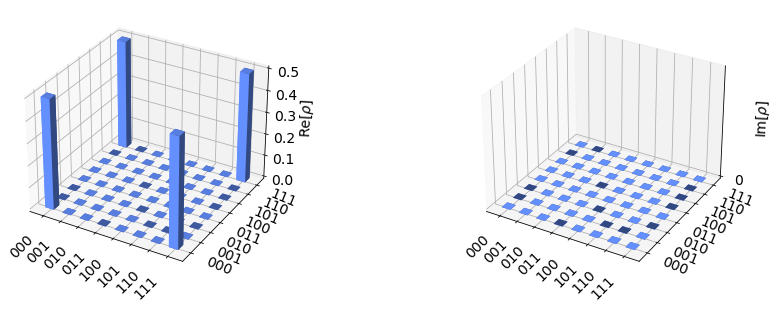

In [9]:
from qiskit.visualization import plot_state_city
plot_state_city(outputstate)

In [10]:
meas = QuantumCircuit(3,3)
meas.barrier(range(3))
meas.measure(range(3),range(3))
circ.add_register(meas.cregs[0])
qc = circ.compose(meas)

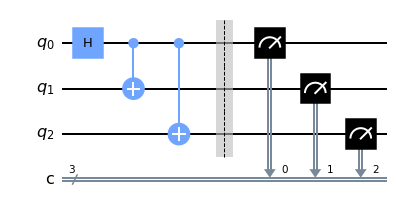

In [11]:
qc.draw('mpl')

In [12]:
backend_sim = Aer.get_backend('qasm_simulator')
job_sim = backend_sim.run(transpile(qc,backend))
result_sim = job_sim.result()

In [13]:
counts = result_sim.get_counts(qc)

In [14]:
counts

{'000': 513, '111': 511}

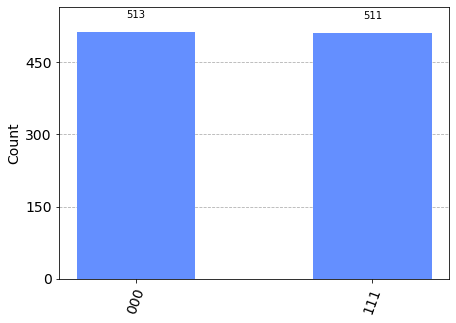

In [15]:
from qiskit.visualization import plot_histogram
plot_histogram(counts)

In [16]:
import qiskit.tools.jupyter
%qiskit_version_table